In [1]:
import warnings
warnings.filterwarnings('ignore')
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [2]:
import pandas as pd
import numpy as np
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [4]:
data = pd.read_excel('좌표.xlsx', encoding = 'UTF-8')
data.head()

,동이름,위도,경도,군집,radius
0,강정동,33.266405,126.524027,1,1000
1,건입동,33.516843,126.543381,2,500
2,구좌읍,33.497395,126.789699,0,5000
3,남원읍,33.330411,126.663883,2,6000
4,대정읍,33.257039,126.242604,0,2500


In [5]:
data.shape

(23, 5)

In [6]:
data['동이름'].unique()

array(['강정동', '건입동', '구좌읍', '남원읍', '대정읍', '중문동', '서귀동', '성산읍', '아라동',
       '외도일동', '용담', '우도면', '표선면', '한림읍', '이도이동', '연동', '노형동', '화북동',
       '일도일동', '삼도일동', '삼도이동', '서홍동', '일도이동'], dtype=object)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


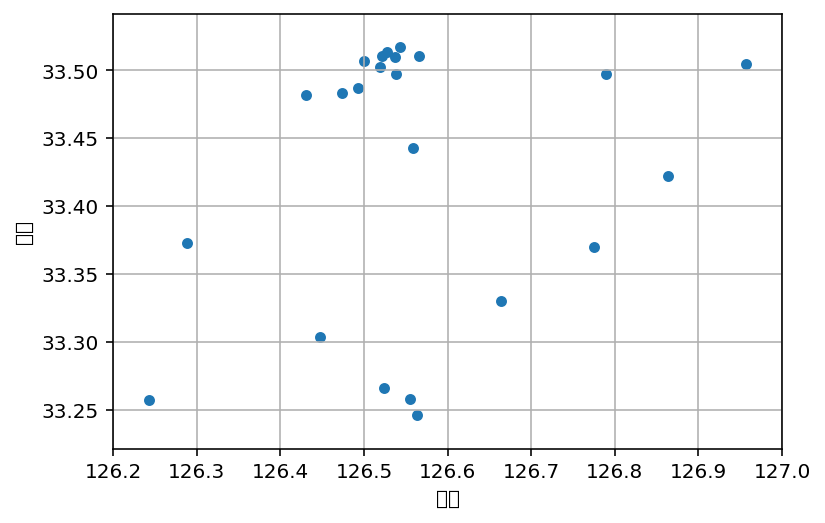

In [7]:
data[:].plot.scatter(x = '경도', y ='위도', grid = 'True')

In [8]:
data.isnull().sum()

동이름       0
위도        0
경도        0
군집        0
radius    0
dtype: int64

In [9]:
data['동이름'].value_counts()

우도면     1
용담      1
대정읍     1
삼도이동    1
노형동     1
일도일동    1
이도이동    1
화북동     1
강정동     1
중문동     1
서귀동     1
한림읍     1
삼도일동    1
성산읍     1
구좌읍     1
일도이동    1
서홍동     1
아라동     1
외도일동    1
남원읍     1
표선면     1
건입동     1
연동      1
Name: 동이름, dtype: int64

In [10]:
data.describe(include = np.object)

,동이름
count,23
unique,23
top,우도면
freq,1


In [11]:
data[['위도', '경도']].describe(include = np.number)

,위도,경도
count,23.000000,23.000000
mean,33.425747,126.559918
std,0.100134,0.163295
min,33.246420,126.242604
25%,33.350333,126.496121
50%,33.483213,126.537196
75%,33.505523,126.564811
max,33.516843,126.957229


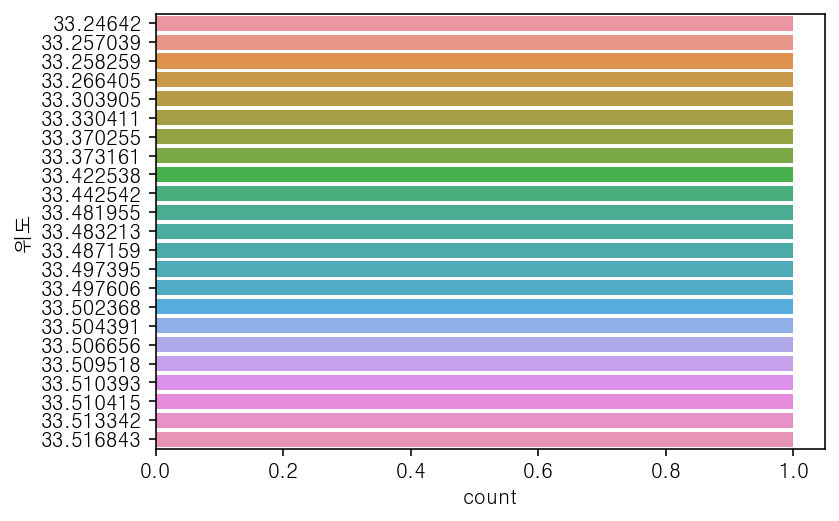

In [12]:
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
font_path = 'C:/Windows/Fonts/H2GTRM.TTF'   # 윈도 모든 폰트가 있는 곳
font_name = font_manager.FontProperties(fname=font_path).get_name()   # 폰트 이름을 가져온다 . 
# rc = resource configuration  폰트이름
matplotlib.rc('font', family = font_name)    # 가져 font를 출력 한다.
sns.countplot(data = data, y = '위도')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
동이름       23 non-null object
위도        23 non-null float64
경도        23 non-null float64
군집        23 non-null int64
radius    23 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.0+ KB


In [14]:
data2 = data



In [15]:
data2

,동이름,위도,경도,군집,radius
0,강정동,33.266405,126.524027,1,1000
1,건입동,33.516843,126.543381,2,500
2,구좌읍,33.497395,126.789699,0,5000
3,남원읍,33.330411,126.663883,2,6000
4,대정읍,33.257039,126.242604,0,2500
5,중문동,33.303905,126.447574,2,2500
6,서귀동,33.246420,126.563795,1,750
7,성산읍,33.422538,126.864004,0,5000
8,아라동,33.442542,126.558878,3,4500
9,외도일동,33.481955,126.430180,2,1200


In [16]:
data2['위도'] = data2['위도'].astype(float)
data2['경도'] = data2['경도'].astype(float)
data2['군집화'] = data2['군집'].astype(float)

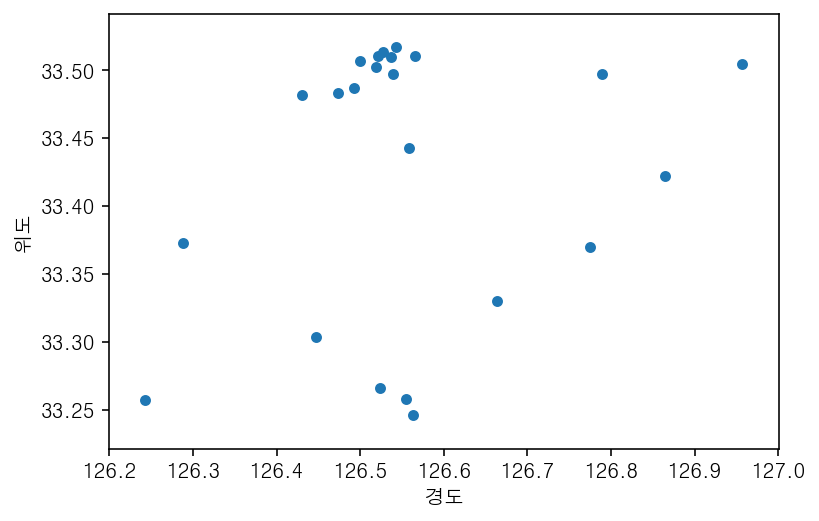

In [17]:
data2.plot.scatter(x = '경도', y = '위도')

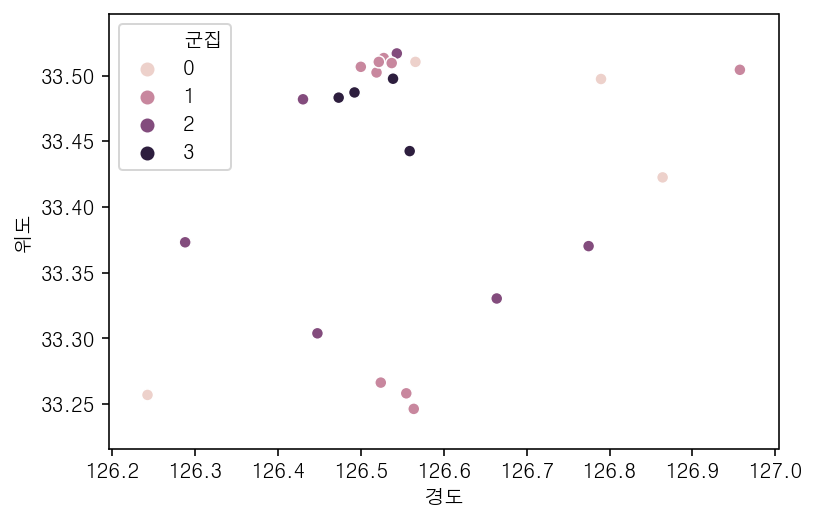

In [18]:
sns.scatterplot(data = data2, x = '경도', y = '위도', hue = '군집')

In [19]:
import pandas as pd
import numpy as np
import folium

In [20]:
data33 = pd.read_excel('제주고등학교 위치 좌표.xlsx')
loc=data33['좌표']

In [21]:
import folium
name = data33['학교 이름']
locat= [[33.489230, 126.483109],[33.492869, 126.592909],[33.515689, 126.862629],[33.477382, 126.564533], [33.489230, 126.483], [33.492869, 126.592909],[33.515689, 126.862629],
[33.477382, 126.564533],[33.460103, 126.333547],[33.454904, 126.579668],[33.515279, 126.557205],[33.472298, 126.481976],
[33.426157, 126.530207], [33.513312, 126.509223],[33.481192, 126.541853],[33.514572, 126.536393],
[33.433152, 126.425637],[33.479788, 126.479877],[33.474495, 126.572548],[33.490599, 126.539558],
[33.398446, 126.257645],[33.406969, 126.268795],[33.544049, 126.652215],[33.449653, 126.434196],
[33.487900, 126.542571],[33.275712, 126.564177],[33.232235, 126.260516],[33.229266, 126.252742],[33.254492, 126.584317],
[33.257954, 126.562751],[33.296882, 126.594395],[33.243310, 126.531615],[33.469731, 126.915569],[33.253963, 126.447335],[33.331020, 126.828055]]
# location = pd.to_numeric(location, errors = 'ignore')

In [22]:
data22 = pd.read_excel('제주중학교 위치 좌표.xlsx')
loc2 = data22['좌표']

In [23]:
name = data22['학교명']

location =[[33.299973, 126.181971],
[33.479314, 126.405601],
[33.552479, 126.750729],
[33.479092, 126.475686],
[33.515234, 126.509361],
[33.521357, 126.853353],
[33.477591, 126.562556],
[33.472713, 126.368917],
[33.349001, 126.184545],
[33.485745, 126.545629],
[33.464829, 126.324332],
[33.513451, 126.584837],
[33.515871, 126.555854],
[33.505321, 126.955949],
[33.325154, 126.252469],
[33.502379, 126.540795],
[33.518564, 126.571613],
[33.494362, 126.480955],
[33.483210, 126.540485],
[33.494960, 126.538959],
[33.511666, 126.516463],
[33.505172, 126.521065],
[33.486172, 126.500447],
[33.945623, 126.325619],
[33.491772, 126.545586],
[33.478056, 126.485295],
[33.410188, 126.260735],
[33.405655, 126.266483],
[33.536425, 126.672548],
[33.281675, 126.717735],
[33.275084, 126.565303],
[33.272262, 126.201420],
[33.254839, 126.562098],
[33.257066, 126.506418],
[33.256157, 126.546670],
[33.247630, 126.570228],
[33.443601, 126.910611],
[33.381296, 126.875602],
[33.248542, 126.337726],
[33.280703, 126.663588],
[33.250683, 126.428984],
[33.330428, 126.830592],
[33.264852, 126.62084]]

In [24]:
data44 = pd.read_excel('제주초등학교 위치 좌표.xlsx')
lo3 = data44['좌표']

In [25]:
name = data44['초등 학교명']

locati = [[33.303955, 126.177421],
[33.446812, 126.307285],
[33.460089, 126.436775],
[33.502839, 126.529934],
[33.473143, 126.374831],
[33.551212, 126.797797],
[33.442401, 126.293423],
[33.356491, 126.295793],
[33.555084, 126.750772],
[33.493130, 126.539610],
[33.435186, 126.330824],
[33.484573, 126.476096],
[33.499296, 126.658217],
[33.453538, 126.345388],
[33.493861, 126.525644],
[33.513395, 126.583232],
[33.501690, 126.465436],
[33.480671, 126.447331],
[33.501376, 126.547729],
[33.518795, 126.575856],
[33.465572, 126.391371],
[33.486946, 126.470496],
[33.490195, 126.593806],
[33.547503, 126.691846],
[33.502815, 126.525443],
[33.520754, 126.586491],
[33.514989, 126.577084],
[33.522413, 126.858514],
[33.470925, 126.781001],
[33.425319, 126.270128],
[33.491629, 126.484263],
[33.482608, 126.497757],
[33.348959, 126.183934],
[33.533710, 126.619442],
[33.476100, 126.543702],
[33.465000, 126.322759],
[33.419655, 126.313298],
[33.478317, 126.567019],
[33.489383, 126.513574],
[33.492809, 126.434451],
[33.505873, 126.955774],
[33.492397, 126.478246],
[33.487983, 126.532259],
[33.507191, 126.538111],
[33.509548, 126.529165],
[33.449237, 126.390480],
[33.388036, 126.237678],
[33.326179, 126.251548],
[33.509631, 126.521170],
[33.515397, 126.551357],
[33.514416, 126.533269],
[33.514993, 126.522615],
[33.511702, 126.510587],
[33.502529, 126.515813],
[33.535201, 126.633848],
[33.492349, 126.897075],
[33.964170, 126.295249],
[33.529177, 126.840507],
[33.483783, 126.415007],
[33.479443, 126.401914],
[33.517170, 126.878548],
[33.538417, 126.828824],
[33.477975, 126.486288],
[33.411100, 126.260878],
[33.507214, 126.512768],
[33.538233, 126.672230],
[33.456566, 126.454212],
[33.518231, 126.562017],
[33.305388, 126.799896],
[33.234828, 126.478839],
[33.278529, 126.715544],
[33.232023, 126.238839],
[33.224870, 126.255393],
[33.251497, 126.304460],
[33.246891, 126.477419],
[33.449052, 126.913833],
[33.260125, 126.570504],
[33.237167, 126.508690],
[33.244494, 126.600020],
[33.249273, 126.275783],
[33.233631, 126.299664],
[33.256278, 126.513193],
[33.288015, 126.326514],
[33.259917, 126.558811],
[33.254600, 126.556455],
[33.252576, 126.563873],
[33.244185, 126.566255],
[33.253685, 126.528843],
[33.467907, 126.931617],
[33.383403, 126.798308],
[33.447143, 126.885198],
[33.479398, 126.895298],
[33.284381, 126.631983],
[33.381283, 126.875675],
[33.250387, 126.335957],
[33.246194, 126.391633],
[33.408032, 126.896974],
[33.274044, 126.653665],
[33.310877, 126.713951],
[33.252216, 126.429668],
[33.263300, 126.369287],
[33.285989, 126.743012],
[33.311989, 126.777635],
[33.265740, 126.589411],
[33.329677, 126.834740],
[33.348735, 126.850236],
[33.264168, 126.630868],
[33.253002, 126.459253],
[33.351901, 126.814953],
[33.264055, 126.616157],
[33.299732, 126.765519]]


In [80]:
geo_df = data2.copy()

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = str(geo_df['군집'][n])+ ' - ' + geo_df['동이름'][n]
    
    if geo_df['군집'][n] == 0.0:
        icon_color = 'green'
    elif geo_df['군집'][n] == 1.0:
        icon_color ='grey'
    else: icon_color ='red'
        
    folium.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=10,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
    
    folium.Circle(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        popup = popup_name,
        radius = str(geo_df['radius'][n]),
        color=icon_color,
        alpha=0.5,
        fill = True
    ).add_to(map)
    
for i in range(len(loc)):  # 고등학교
      folium.CircleMarker(
        locat[i], 
        color = 'Purple',
        radius = 2,
        fill = True,
        icon = folium.Icon(icon = 'school')
      ).add_to(map)
        
for i in range(len(loc2)):  # 중학교
    folium.CircleMarker(location[i],
                  color = 'Purple',
                  radius = 2,
                  fill = True,
                  ).add_to(map)
    
for i in range(len(lo3)):  # 초등학교
    folium.CircleMarker(locati[i],
                  color = 'Purple',
                  radius = 2,
                  fill = True
                 ).add_to(map)

for i in range(len(busstop)): # 버스정류장
    if(busstop["등급"][i]==2):
        folium.CircleMarker([busstop["위도"][i], busstop["경도"][i]],
                            color = '#db1c10',
                            radius=2).add_to(map)
    elif(busstop["등급"][i]==1):
        folium.CircleMarker([busstop["위도"][i], busstop["경도"][i]],
                            color = '#f4785d',
                            radius=2).add_to(map)        
    else:
        folium.CircleMarker([busstop["위도"][i], busstop["경도"][i]],
                            color = '#ffded4',
                            radius=2).add_to(map)

for i in range(len(offices)):
    folium.CircleMarker([offices["위도"][i], offices["경도"][i]],
                       color = "#008080",
                       radius=1).add_to(map)
    

folium.Marker([33.492529, 126.536611]).add_to(map) #33.497606	126.538789
folium.Marker([33.489350, 126.497026]).add_to(map)
folium.Marker([33.481458, 126.472866]).add_to(map)

legend_html = '''<div style="position:fixed;\
bottom:50px; left:50px; width:130px; height:210px; border:2px solid grey; \
z-index:9999; font-size:14px;"> &nbsp; 범 례 <br>\
&nbsp; Good(2) :: &nbsp; <i class="fa fa-bullseye" style="color:red"></i><br>\
&nbsp; Normal(1) :: &nbsp; <i class="fa fa-bullseye" style="color:green"></i><br>\
&nbsp; Bad(0) :: &nbsp; <i class="fa fa-bullseye" style="color:grey"></i><br>\
<br>\
&nbsp; School :: &nbsp; <i class="fa fa-circle" style="color:purple"></i><br>\
&nbsp; PB Office :: &nbsp; <i class="fa fa-circle" style="color:#008080"></i><br>\
&nbsp; Bus stop(2) :: &nbsp; <i class="fa fa-circle" style="color:#db1c10"></i><br>\
&nbsp; Bus stop(1) :: &nbsp; <i class="fa fa-circle" style="color:#f4785d"></i><br>\
&nbsp; Bus stop(0) :: &nbsp; <i class="fa fa-circle" style="color:#ffded4"></i><br>\
</div>'''

map.get_root().html.add_child(folium.Element(legend_html))
map.save("map.html")
map

In [ ]:
관공서, 은행, 학원, 숙박업소
https://fontawesome.com/v4.7.0/icon/bullseye

In [57]:
data2 = pd.read_excel('좌표.xlsx', encoding = 'UTF-8')
data2


,동이름,위도,경도,군집,radius
0,강정동,33.266250,126.499938,0,4000
1,건입동,33.516843,126.543381,1,500
2,구좌읍,33.497395,126.789699,1,5000
3,남원읍,33.330411,126.663883,1,6000
4,대정읍,33.257039,126.242604,1,2500
5,중문동,33.303905,126.447574,1,2500
6,서귀동,33.246420,126.563795,0,750
7,성산읍,33.422538,126.864004,1,5000
8,아라동,33.442542,126.558878,2,4500
9,외도일동,33.481955,126.430180,1,1200


In [72]:
busstop = pd.read_excel('busstop.xlsx', encoding = 'UTF-8')
busstop

,정류소명,위도,경도,승객합,등급
0,(구)중앙파출소,33.247515,126.560890,3942,1
1,1100고지휴게소,33.357826,126.462945,337,0
2,1100도로입구,33.251451,126.431536,1282,1
3,4.3 평화공원,33.451192,126.621620,301,0
4,4.3 평화공원 입구,33.453117,126.620093,1,0
...,...,...,...,...,...
1665,화순동취락지구,33.249640,126.339823,6274,2
1666,화순리,33.246369,126.331967,9,0
1667,화순리 생태탐방로,33.264629,126.333527,333,0
1668,화순문화마을,33.252605,126.330104,415,0


In [32]:
offices= pd.read_excel('offices.xlsx', encoding = 'UTF-8')
offices

,장소,위도,경도
0,노형동주민센터,33.483030,126.477225
1,연동주민센터,33.488131,126.496952
2,제주시스포츠진흥과,33.495343,126.514225
3,제주시교육지원청,33.493955,126.538377
4,삼도2동주민센터,33.511679,126.522219
...,...,...,...
163,제주특별자치도수자원본부,33.499650,126.650358
164,사계보건진료소,33.232310,126.299324
165,하귀우체국,33.481237,126.404997
166,제주서부소방서,33.402549,126.270306
